In [2]:
!pip install nxviz=='0.6.3'

In [64]:
import networkx as nx

import nxviz
from nxviz.plots import CircosPlot
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

## EDA

In [4]:
tweets_df = pd.read_csv('./tweets_dataframe (1).csv')

In [5]:
tweets_df.columns

Index(['Unnamed: 0', 'keyword', 'user', 'tweet_date', 'text', 'favorite_count',
       'retweet_count', 'user_tweets_count', 'user_creation', 'location',
       'retweeted', 'retweet_fav_count', 'retweeted_from'],
      dtype='object')

In [6]:
tweets_df['retweeted'].value_counts()

True     55080
False    16920
Name: retweeted, dtype: int64

In [7]:
tweets_df['keyword'].value_counts()

passaporte vacinal    18000
passaporte            18000
vacina                18000
covid-19              18000
Name: keyword, dtype: int64

In [8]:
tweets_df.head()[['retweeted_from', 'user', 'keyword']]

,retweeted_from,user,keyword
0,Jrodrigues1954,DebacoAlan,passaporte vacinal
1,Jrodrigues1954,LigiaGuerra7,passaporte vacinal
2,Jrodrigues1954,VilmaThomasCos1,passaporte vacinal
3,Jrodrigues1954,escoladeprofeta,passaporte vacinal
4,Jrodrigues1954,PedroVa18482025,passaporte vacinal


In [9]:
not_ret_tweets_df = tweets_df[tweets_df.retweeted == False]

In [10]:
not_ret_tweets_df.head()[['retweeted_from', 'user', 'keyword']]

,retweeted_from,user,keyword
7,NaN,Deon03360798,passaporte vacinal
14,NaN,lagesdiario,passaporte vacinal
20,NaN,cafe_cidadania,passaporte vacinal
22,NaN,naraffe,passaporte vacinal
50,NaN,BhzPatriota,passaporte vacinal


In [11]:
# Removendo os tweets que falavam somente sobre passaporte
filtered_tweets_df = tweets_df[tweets_df['keyword'] != 'passaporte']

# Selecionando as colunas que serão utilizadas
filtered_tweets_df = filtered_tweets_df[['retweeted_from', 'user', 'keyword']]

In [12]:
filtered_tweets_df.head()

,retweeted_from,user,keyword
0,Jrodrigues1954,DebacoAlan,passaporte vacinal
1,Jrodrigues1954,LigiaGuerra7,passaporte vacinal
2,Jrodrigues1954,VilmaThomasCos1,passaporte vacinal
3,Jrodrigues1954,escoladeprofeta,passaporte vacinal
4,Jrodrigues1954,PedroVa18482025,passaporte vacinal


In [13]:
# Selecionando todos os usuários do dataset
tweet_users = list(filtered_tweets_df['retweeted_from'].unique())

retweet_users = list(filtered_tweets_df['user'].unique())

users = set(tweet_users + retweet_users)

len(users)

335

In [14]:
filtered_tweets_df_edges = filtered_tweets_df[['retweeted_from', 'user']].dropna()

In [15]:
filtered_tweets_df_edges = filtered_tweets_df_edges.groupby(filtered_tweets_df_edges.columns.tolist(), 
                                                             as_index=False).size()

In [16]:
filtered_tweets_df_edges.shape

(208, 3)

In [17]:
filtered_tweets_df_edges.head(10)

,retweeted_from,user,size
0,AfonsoRaimundo7,sosopiava,180
1,AlessandroLoio2,Gavansky,180
2,AlessandroLoio2,Lucas_Isaias_,180
3,AlessandroLoio2,casal_mcqo_sao,180
4,AlfredoLuizPuc2,carlosa78676009,180
5,ArnoMaciel2,MarciaB16982788,180
6,ArnoMaciel2,bessiedyrns,180
7,BTSxBRAZIL,Eduarda51242742,180
8,BolsominiaS,sosopiava,180
9,ConassOficial,sousa2607,180


In [18]:
filtered_tweets_df_edges['size'].value_counts()

180    203
360      4
540      1
Name: size, dtype: int64

In [19]:
filtered_tweets_df[
                   (filtered_tweets_df['retweeted_from'] == 'AfonsoRaimundo7') &
                   (filtered_tweets_df['user'] == 'sosopiava')
                   ].shape

(180, 3)

## Montando a rede

In [20]:
# Create graph
G = nx.DiGraph()

In [21]:
G.add_nodes_from(list(users))

In [22]:
for index, row in filtered_tweets_df_edges.iterrows():
    G.add_edge(row['retweeted_from'], row['user'], weight=row['size'])

In [24]:
print("A rede possui {} nodes and {} edges".format(G.number_of_nodes(),
                                                   G.number_of_edges()))

A rede possui 335 nodes and 208 edges


In [60]:
nx.write_graphml(G, 'tweets-network.graphml')

## Visualização

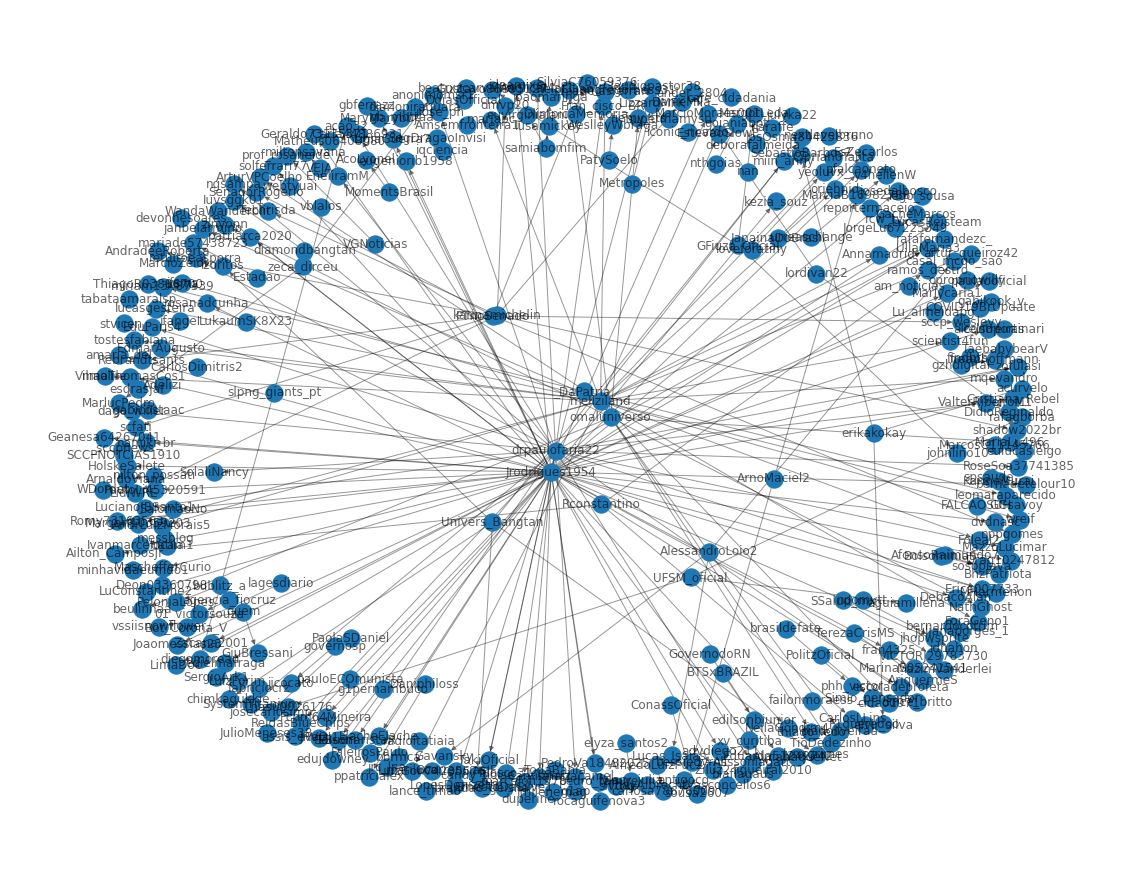

In [56]:
fig, ax = plt.subplots(1,1,figsize=(20,16))

# layout position
pos = nx.spring_layout(G,seed=123456789,k=0.3)

# draw edges
nx.draw_networkx_edges(G,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                 pos=pos,
                 cmap=plt.cm.jet,
                 ax=ax)

# draw labels
nx.draw_networkx_labels(G, pos=pos,
                        alpha=0.6,
                        font_color='black', ax=ax)

plt.axis("off")
# plt.colorbar(nodes)
plt.show()

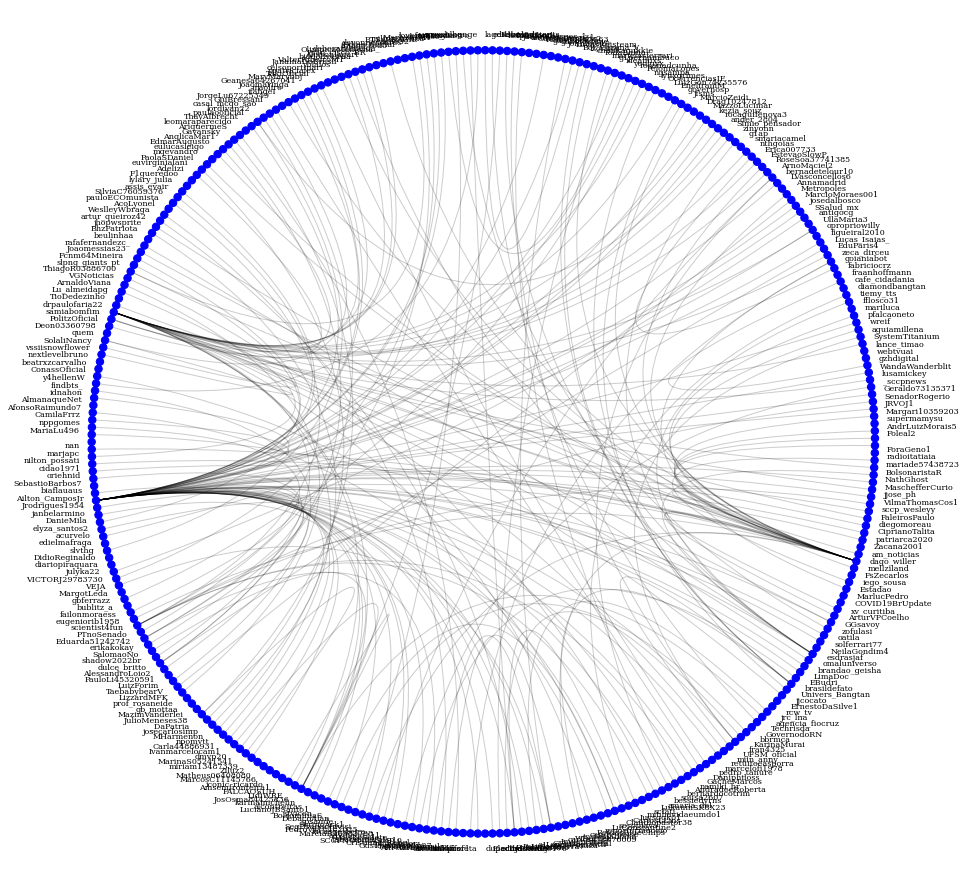

In [59]:
c = CircosPlot(G, 
               node_labels=True,
               figsize=(20,16),
               fontsize=8,)

# Draw c to the screen
c.draw()

# Display graph
plt.show()

### Degree Centrality

In [70]:
# Top 20 users centrais com base nos vizinhos
[key for key, value in sorted(nx.degree_centrality(G).items(), key=lambda x: x[1])[-20:]]

['zofulasi',
 'zeca_dirceu',
 'UllaMaria3',
 'ArnoMaciel2',
 'lordivan22',
 'slpng_giants_pt',
 'quem',
 'erikakokay',
 'AlessandroLoio2',
 'Rconstantino',
 'GFiuza_Oficial',
 'UFSM_oficial',
 'samiabomfim',
 'Univers_Bangtan',
 'PTnoSenado',
 'karinamichelin',
 'omaluniverso',
 'mellziland',
 'drpaulofaria22',
 'Jrodrigues1954']

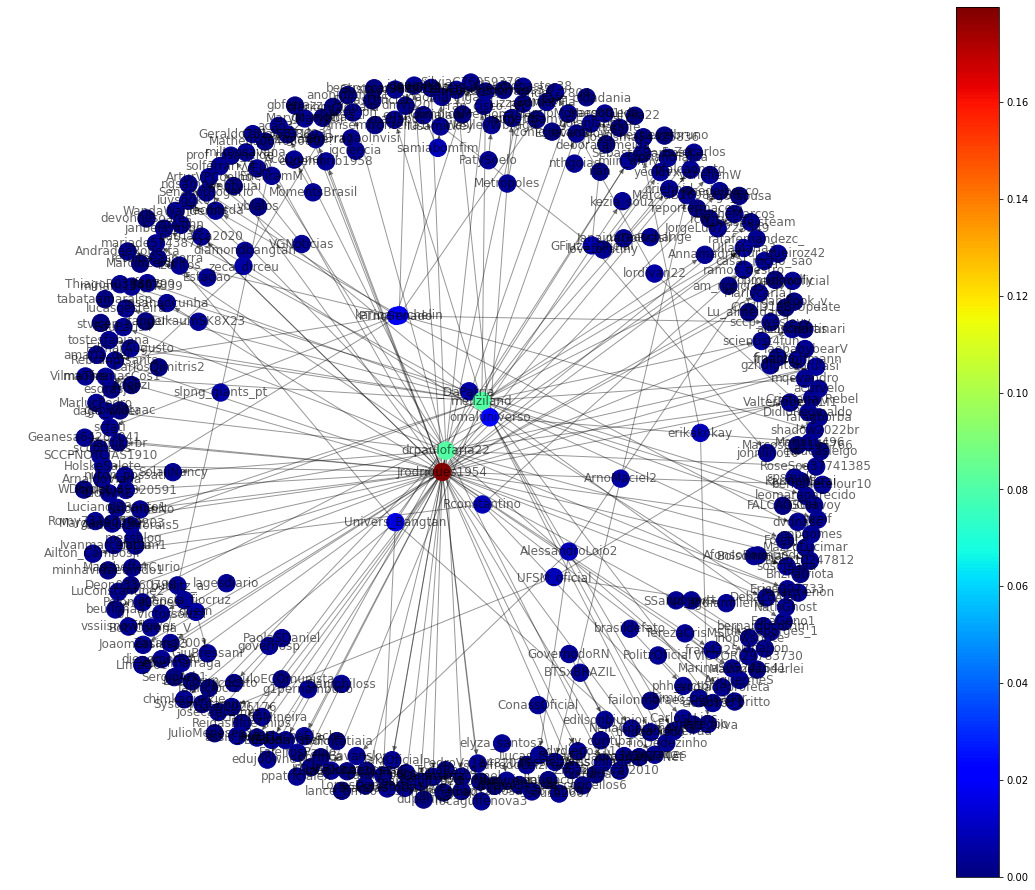

In [63]:
fig, ax = plt.subplots(1,1,figsize=(20,16))

# layout position
pos = nx.spring_layout(G,seed=123456789,k=0.3)

color = list(dict(nx.degree_centrality(G)).values())

# draw edges
nx.draw_networkx_edges(G,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# draw labels
nx.draw_networkx_labels(G, pos=pos,
                        alpha=0.6,
                        font_color='black', ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()

### Eigenvector centrality

In [78]:
# Top 20 usuários centrais com base em Eigenvector centrality
[key for key, value in sorted(nx.eigenvector_centrality(G, max_iter=500).items(), key=lambda x: x[1])[-20:]]

['WeslleyWbraga',
 'artur_queiroz42',
 'jhopwsprite',
 'beulinhaa',
 'rafafernandezc_',
 'Joaomessias23',
 'Fcnm64Mineira',
 'ThiagoR03886700',
 'ArnaldoViana',
 'TioDedezinho',
 'SolaliNancy',
 'vssiisnowflower',
 'y4hellenW',
 'idnahon',
 'CamilaFrrz',
 'nppgomes',
 'MariaLu496',
 'sosopiava',
 'zofulasi',
 'UllaMaria3']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.


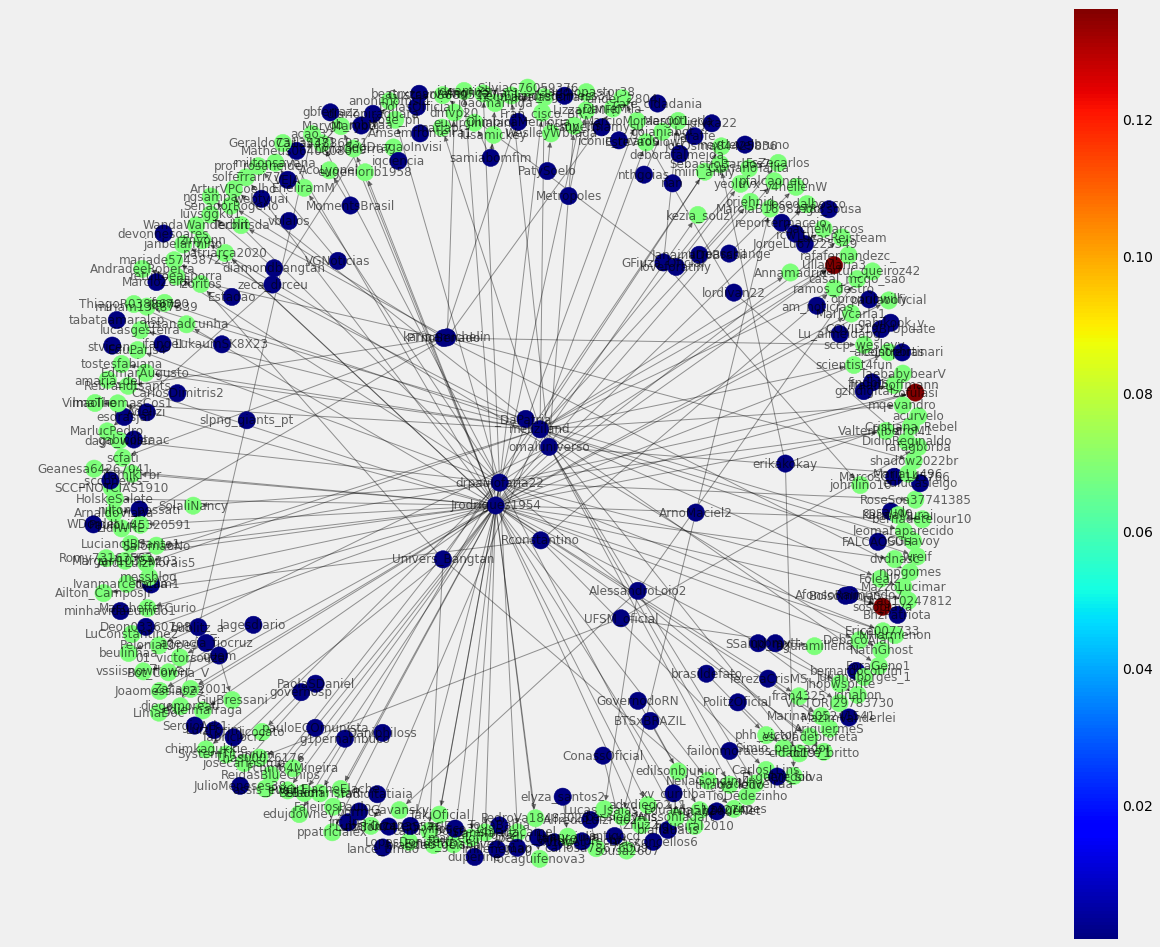

In [77]:
fig, ax = plt.subplots(1,1,figsize=(20,16))

# layout position
pos = nx.spring_layout(G,seed=123456789,k=0.3)

color = list(dict(nx.eigenvector_centrality(G, max_iter=500)).values())

# draw edges
nx.draw_networkx_edges(G,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# draw labels
nx.draw_networkx_labels(G, pos=pos,
                        alpha=0.6,
                        font_color='black', ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()

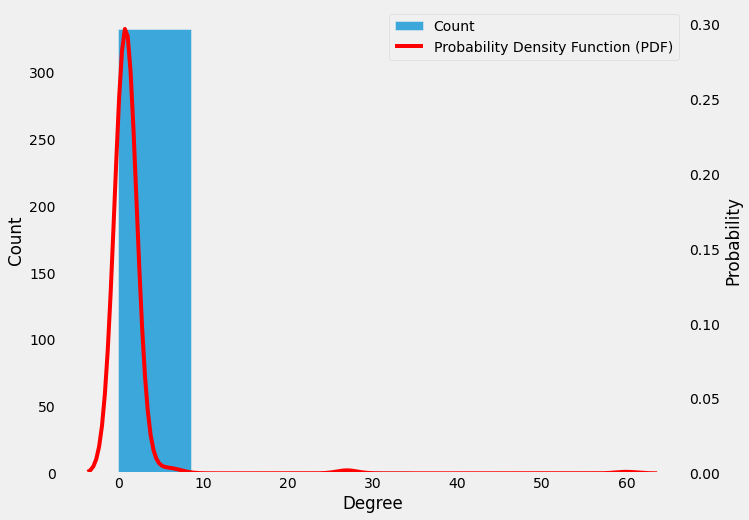

In [79]:
plt.style.use("fivethirtyeight")

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Probability Density Function (PDF)",ax=ax2)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.show()